In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

[DEBUG] Using default logger (stdout, stderr).


In [2]:
taxa = ['B_caccae',
        'B_cellulosilyticus_WH2',
        'B_ovatus',
        'B_thetaiotaomicron',
        'B_uniformis',
        'B_vulgatus',
        'C_aerofaciens',
        'C_scindens',
        'C_spiroforme',
        'P_distasonis',
        'R_obeum'
        ]

# pretty_names_dir = {'B_caccae': '$B. caccae$',
#                 'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
#                 'B_ovatus': '$B. ovatus$',
#                 'B_thetaiotaomicron': '$B. thetaiotaomicron$',
#                 'B_uniformis': '$B. uniformis$',
#                 'B_vulgatus': '$B. vulgatus$',
#                 'C_aerofaciens': '$C. aerofaciens$',
#                 'C_scindens': '$C. scindens$',
#                 'C_spiroforme': '$C. spiroforme$',
#                 'P_distasonis': '$P. distasonis$',
#                 'R_obeum': '$R. obeum$',
#                 'S': '$M1$',
#                 'T': '$M2$',
#                 'U': '$M3$',
#                 }

pretty_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob',
                'S': '$C_{1}$',
                'T': '$C_{2}$',
                'U': '$C_{3}$',
                }

cols = ['#b91f1c',
        '#016bff',
        '#308937',
        '#ff8137',
        '#6f4fc7',
        '#d4b300',
        '#893a2b',
        '#ff6c79',
        '#16c4ff',
        '#766f41',
        '#00c800',
        # '#af3261'
        ]

In [3]:
# growth = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/growth.npy')
# interactions = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/interactions.npy')
# perturbations = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/perturbations.npz')['HF/HS']
# perturbations_start = [13]
# perturbations_end = [27]
# dt = 0.01
# start_time = 0
# n_days = 40
# initial_conditions = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/initial_abundances.tsv', header=None, index_col=0).values

# base = []
# excluded = []
# excluded_s = []
# excluded_t = []
# excluded_u = []
# for i in range(0, growth.shape[0], 20):
#     dyn = md2.model.gLVDynamicsSingleClustering(
#         growth=growth[i],
#         interactions=interactions[i],
#         perturbations=[perturbations[i]],
#         perturbation_starts=perturbations_start,
#         perturbation_ends=perturbations_end,
#         start_day=start_time
#         )
#     x = md2.integrate(
#         dynamics=dyn,
#         initial_conditions=initial_conditions,
#         dt=dt,
#         n_days=n_days + dt,
#         subsample=False
#     )
#     base.append(x['X'])
#     exs = []
#     for ex in range(len(taxa)):
#         initial_conditions_ex = initial_conditions.copy()
#         initial_conditions_ex[ex,0] = 0
#         x = md2.integrate(
#             dynamics=dyn,
#             initial_conditions=initial_conditions_ex,
#             dt=dt,
#             n_days=n_days + dt,
#             subsample=False
#         )
#         exs.append(x['X'])
#     excluded.append(exs)

#     initial_conditions_ex = initial_conditions.copy()
#     initial_conditions_ex[1,0] = 0
#     initial_conditions_ex[2,0] = 0
#     initial_conditions_ex[10,0] = 0
#     dyn = md2.model.gLVDynamicsSingleClustering(
#         growth=growth[i],
#         interactions=interactions[i],
#         perturbations=[perturbations[i]],
#         perturbation_starts=perturbations_start,
#         perturbation_ends=perturbations_end,
#         start_day=start_time
#         )
#     x = md2.integrate(
#         dynamics=dyn,
#         initial_conditions=initial_conditions_ex,
#         dt=dt,
#         n_days=n_days + dt,
#         subsample=False
#     )
#     excluded_s.append(x['X'])
#     initial_conditions_ex = initial_conditions.copy()
#     initial_conditions_ex[3,0] = 0
#     initial_conditions_ex[4,0] = 0
#     initial_conditions_ex[5,0] = 0
#     initial_conditions_ex[9,0] = 0
#     dyn = md2.model.gLVDynamicsSingleClustering(
#         growth=growth[i],
#         interactions=interactions[i],
#         perturbations=[perturbations[i]],
#         perturbation_starts=perturbations_start,
#         perturbation_ends=perturbations_end,
#         start_day=start_time
#         )
#     x = md2.integrate(
#         dynamics=dyn,
#         initial_conditions=initial_conditions_ex,
#         dt=dt,
#         n_days=n_days + dt,
#         subsample=False
#     )
#     excluded_t.append(x['X'])
#     initial_conditions_ex = initial_conditions.copy()
#     initial_conditions_ex[6,0] = 0
#     initial_conditions_ex[7,0] = 0
#     initial_conditions_ex[8,0] = 0
#     dyn = md2.model.gLVDynamicsSingleClustering(
#         growth=growth[i],
#         interactions=interactions[i],
#         perturbations=[perturbations[i]],
#         perturbation_starts=perturbations_start,
#         perturbation_ends=perturbations_end,
#         start_day=start_time
#         )
#     x = md2.integrate(
#         dynamics=dyn,
#         initial_conditions=initial_conditions_ex,
#         dt=dt,
#         n_days=n_days + dt,
#         subsample=False
#     )
#     excluded_u.append(x['X'])

# base = np.array(base)
# excluded = np.array(excluded)
# excluded_s = np.array(excluded_s)
# excluded_t = np.array(excluded_t)
# excluded_u = np.array(excluded_u)
# times = x['times']

# base_mean = base.mean(axis=0)
# base_std = base.std(axis=0)
# excluded_mean = excluded.mean(axis=0)
# excluded_std = excluded.std(axis=0)
# excluded_s_mean = excluded_s.mean(axis=0)
# excluded_s_std = excluded_s.std(axis=0)
# excluded_t_mean = excluded_t.mean(axis=0)
# excluded_t_std = excluded_t.std(axis=0)
# excluded_u_mean = excluded_u.mean(axis=0)
# excluded_u_std = excluded_u.std(axis=0)

# base_df = pd.DataFrame(base_mean[:,1300], index=taxa, columns=['abundance_d13'])
# base_df.index.name = 'Species'
# base_df['abundance_d27'] = base_mean[:,2700]
# base_df['abundance_d40'] = base_mean[:,4000]
# base_df.reset_index(inplace=True)

# excluded_df = []
# for i in range(len(taxa)):
#     excl = pd.DataFrame(excluded_mean[i][:,1300], index=taxa, columns=['abundance_d13'])
#     excl.index.name = 'Species'
#     excl['abundance_d27'] = excluded_mean[i][:,2700]
#     excl['abundance_d40'] = excluded_mean[i][:,4000]
#     excl['Excluded'] = taxa[i]
#     excl.reset_index(inplace=True)
#     excl = excl.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]
#     excluded_df.append(excl)

# excluded_s_df = pd.DataFrame(excluded_s_mean[:,1300], index=taxa, columns=['abundance_d13'])
# excluded_s_df.index.name = 'Species'
# excluded_s_df['abundance_d27'] = excluded_s_mean[:,2700]
# excluded_s_df['abundance_d40'] = excluded_s_mean[:,4000]
# excluded_s_df['Excluded'] = 'S'
# excluded_s_df.reset_index(inplace=True)
# excluded_s_df = excluded_s_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

# excluded_t_df = pd.DataFrame(excluded_t_mean[:,1300], index=taxa, columns=['abundance_d13'])
# excluded_t_df.index.name = 'Species'
# excluded_t_df['abundance_d27'] = excluded_t_mean[:,2700]
# excluded_t_df['abundance_d40'] = excluded_t_mean[:,4000]
# excluded_t_df['Excluded'] = 'T'
# excluded_t_df.reset_index(inplace=True)
# excluded_t_df = excluded_t_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

# excluded_u_df = pd.DataFrame(excluded_u_mean[:,1300], index=taxa, columns=['abundance_d13'])
# excluded_u_df.index.name = 'Species'
# excluded_u_df['abundance_d27'] = excluded_u_mean[:,2700]
# excluded_u_df['abundance_d40'] = excluded_u_mean[:,4000]
# excluded_u_df['Excluded'] = 'U'
# excluded_u_df.reset_index(inplace=True)
# excluded_u_df = excluded_u_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

# excluded_df = pd.concat(excluded_df + [excluded_s_df, excluded_t_df, excluded_u_df])

# ss_diff = excluded_df.merge(base_df, on='Species', suffixes=['_excluded', '_base'])
# ss_diff.dropna(inplace=True)
# ss_diff['diff_log'] = -(np.log10(ss_diff['abundance_d40_excluded']+10**4) - np.log10(ss_diff['abundance_d40_base']+10**4))
# ss_diff_matrix = ss_diff.loc[:, ['Excluded', 'Species', 'diff_log']].pivot(index='Excluded', columns='Species', values='diff_log')
# ss_diff_matrix.columns = ss_diff_matrix.columns.map(pretty_names_dir)
# ss_diff_matrix.index = ss_diff_matrix.index.map(pretty_names_dir)

In [4]:
# mask = ss_diff_matrix > 1
# plt.rc('font', size=15)
# cmap = sns.color_palette("coolwarm_r", as_cmap=True)
# plt.figure(figsize=(10,10))
# ax = sns.heatmap(ss_diff_matrix, 
#     cmap=cmap, 
#     mask=mask, 
#     center=0, 
#     # square=True, 
#     cbar_kws={"shrink": .5}, 
#     linewidths=0.5,
#     linecolor='w',
#     annot=True,
#     fmt='.3f',
#     annot_kws={'size': 11}
#     )
# for i in range(mask.shape[0]):
#     for j in range(mask.shape[1]):
#         if mask.iloc[i,j] == True:
#             plt.text(j+0.5, i+0.5, '$\\times$', ha='center', va='center', color='k', fontsize=24)
# cbar = ax.collections[0].colorbar
# cbar.set_label('$\log_{10}$ Abundance Difference from Base', rotation=270, fontsize=15, labelpad=20)
# ax.set_xticklabels(ax.get_xticklabels(), ha='center')
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
# # ax.set_yticks([])
# # ax.set_xticklabels([], ha='right')
# plt.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/keystoneness.svg', bbox_inches='tight')
# plt.show()

In [5]:
# plt.rc('font', size=18)
# fig, axs = plt.subplots(1, 4, figsize=(22, 3.5))

# axs[0].plot(times, base_mean[0], label='Base', lw=1.5, c=cols[0])
# axs[0].plot(times, excluded_mean[2][0], label='Excluding $Bov$', lw=1.5, ls='--', c=cols[0])
# axs[0].plot(times, excluded_s_mean[0], label='Excluding $C_{1}^{LF0}$', lw=1.5, ls='-.', c=cols[0])
# axs[0].legend(fontsize=16)
# axs[0].set_yscale('log')
# axs[0].set_title('$B. caccae$')

# axs[1].plot(times, base_mean[1], label='Base', lw=1.5, c=cols[1])
# axs[1].plot(times, excluded_mean[2][1], label='Excluding $Bov$', lw=1.5, ls='--', c=cols[1])
# axs[1].plot(times, excluded_mean[3][1], label='Excluding $Bth$', lw=1.5, ls='-.', c=cols[1])
# axs[1].legend(fontsize=16)
# axs[1].set_yscale('log')
# axs[1].set_title('$B. cellulosilyticus$')

# axs[2].plot(times, base_mean[9], label='Base', lw=1.5, c=cols[7])
# axs[2].plot(times, excluded_mean[1][9], label='Excluding $Bce$', lw=1.5, ls='--', c=cols[7])
# axs[2].plot(times, excluded_s_mean[9], label='Excluding $C_{1}^{LF0}$', lw=1.5, ls='-.', c=cols[7])
# axs[2].legend(fontsize=16)
# axs[2].set_yscale('log')
# axs[2].set_title('$P. distasonis$')

# axs[3].plot(times, base_mean[8], label='Base', lw=1.5, c=cols[10])
# axs[3].plot(times, excluded_mean[3][8], label='Excluding $Bth$', lw=1.5, ls='--', c=cols[10])
# axs[3].plot(times, excluded_t_mean[8], label='Excluding $C_{2}^{LF0}$', lw=1.5, ls='-.', c=cols[10])
# axs[3].legend(fontsize=16)
# axs[3].set_yscale('log')
# axs[3].set_title('$C. spiroforme$')

# fig.supxlabel('Time (days)', y=-0.09)
# fig.supylabel('$\log_{10}$ Abundance', x=0.09)
# plt.subplots_adjust(wspace=0.3)
# fig.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/trajectories.svg', bbox_inches='tight')
# plt.show()

In [6]:
growth = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/growth.npy')
interactions = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/interactions.npy')
perturbations = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/perturbations.npz')['LF/HPP']
perturbations_start = [13]
perturbations_end = [27]
dt = 0.01
start_time = 0
n_days = 40
initial_conditions = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/initial_abundances.tsv', header=None, index_col=0).values

base = []
excluded = []
excluded_s = []
excluded_t = []
excluded_u = []
for i in range(0, growth.shape[0], 20):
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    base.append(x['X'])
    exs = []
    for ex in range(len(taxa)):
        initial_conditions_ex = initial_conditions.copy()
        initial_conditions_ex[ex,0] = 0
        x = md2.integrate(
            dynamics=dyn,
            initial_conditions=initial_conditions_ex,
            dt=dt,
            n_days=n_days + dt,
            subsample=False
        )
        exs.append(x['X'])
    excluded.append(exs)

    initial_conditions_ex = initial_conditions.copy()
    initial_conditions_ex[1,0] = 0
    initial_conditions_ex[2,0] = 0
    initial_conditions_ex[4,0] = 0
    initial_conditions_ex[10,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    excluded_s.append(x['X'])
    initial_conditions_ex = initial_conditions.copy()
    initial_conditions_ex[3,0] = 0
    initial_conditions_ex[5,0] = 0
    initial_conditions_ex[9,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    excluded_t.append(x['X'])
    initial_conditions_ex = initial_conditions.copy()
    initial_conditions_ex[6,0] = 0
    initial_conditions_ex[7,0] = 0
    initial_conditions_ex[8,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    excluded_u.append(x['X'])

base = np.array(base)
excluded = np.array(excluded)
excluded_s = np.array(excluded_s)
excluded_t = np.array(excluded_t)
excluded_u = np.array(excluded_u)
times = x['times']

base_mean = base.mean(axis=0)
base_std = base.std(axis=0)
excluded_mean = excluded.mean(axis=0)
excluded_std = excluded.std(axis=0)
excluded_s_mean = excluded_s.mean(axis=0)
excluded_s_std = excluded_s.std(axis=0)
excluded_t_mean = excluded_t.mean(axis=0)
excluded_t_std = excluded_t.std(axis=0)
excluded_u_mean = excluded_u.mean(axis=0)
excluded_u_std = excluded_u.std(axis=0)

base_df = pd.DataFrame(base_mean[:,1300], index=taxa, columns=['abundance_d13'])
base_df.index.name = 'Species'
base_df['abundance_d27'] = base_mean[:,2700]
base_df['abundance_d40'] = base_mean[:,4000]
base_df.reset_index(inplace=True)

excluded_df = []
for i in range(len(taxa)):
    excl = pd.DataFrame(excluded_mean[i][:,1300], index=taxa, columns=['abundance_d13'])
    excl.index.name = 'Species'
    excl['abundance_d27'] = excluded_mean[i][:,2700]
    excl['abundance_d40'] = excluded_mean[i][:,4000]
    excl['Excluded'] = taxa[i]
    excl.reset_index(inplace=True)
    excl = excl.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]
    excluded_df.append(excl)

excluded_s_df = pd.DataFrame(excluded_s_mean[:,1300], index=taxa, columns=['abundance_d13'])
excluded_s_df.index.name = 'Species'
excluded_s_df['abundance_d27'] = excluded_s_mean[:,2700]
excluded_s_df['abundance_d40'] = excluded_s_mean[:,4000]
excluded_s_df['Excluded'] = 'S'
excluded_s_df.reset_index(inplace=True)
excluded_s_df = excluded_s_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

excluded_t_df = pd.DataFrame(excluded_t_mean[:,1300], index=taxa, columns=['abundance_d13'])
excluded_t_df.index.name = 'Species'
excluded_t_df['abundance_d27'] = excluded_t_mean[:,2700]
excluded_t_df['abundance_d40'] = excluded_t_mean[:,4000]
excluded_t_df['Excluded'] = 'T'
excluded_t_df.reset_index(inplace=True)
excluded_t_df = excluded_t_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

excluded_u_df = pd.DataFrame(excluded_u_mean[:,1300], index=taxa, columns=['abundance_d13'])
excluded_u_df.index.name = 'Species'
excluded_u_df['abundance_d27'] = excluded_u_mean[:,2700]
excluded_u_df['abundance_d40'] = excluded_u_mean[:,4000]
excluded_u_df['Excluded'] = 'U'
excluded_u_df.reset_index(inplace=True)
excluded_u_df = excluded_u_df.loc[:, ['Excluded', 'Species', 'abundance_d13', 'abundance_d27', 'abundance_d40']]

excluded_df = pd.concat(excluded_df + [excluded_s_df, excluded_t_df, excluded_u_df])

ss_diff = excluded_df.merge(base_df, on='Species', suffixes=['_excluded', '_base'])
ss_diff.dropna(inplace=True)
ss_diff['diff_log'] = -(np.log10(ss_diff['abundance_d40_excluded']+10**4) - np.log10(ss_diff['abundance_d40_base']+10**4))
ss_diff_matrix = ss_diff.loc[:, ['Excluded', 'Species', 'diff_log']].pivot(index='Excluded', columns='Species', values='diff_log')
ss_diff_matrix.columns = ss_diff_matrix.columns.map(pretty_names_dir)
ss_diff_matrix.index = ss_diff_matrix.index.map(pretty_names_dir)

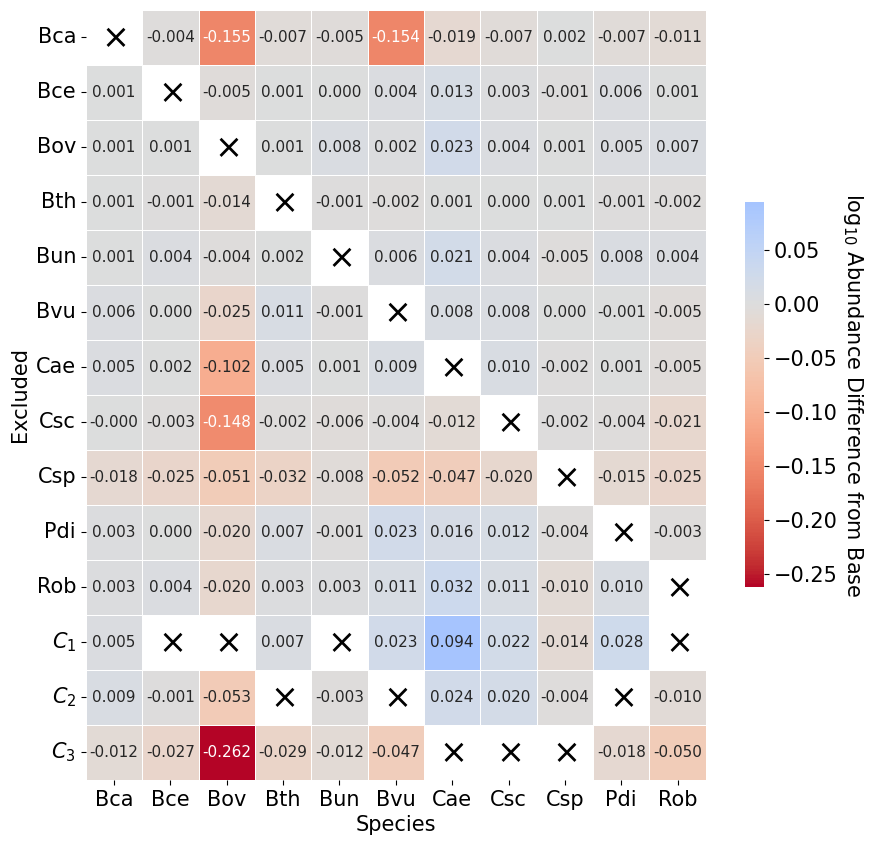

In [7]:
mask = ss_diff_matrix > 1
plt.rc('font', size=15)
cmap = sns.color_palette("coolwarm_r", as_cmap=True)
plt.figure(figsize=(10,10))
ax = sns.heatmap(ss_diff_matrix, 
    cmap=cmap, 
    mask=mask, 
    center=0, 
    # square=True, 
    cbar_kws={"shrink": .5}, 
    linewidths=0.5,
    linecolor='w',
    annot=True,
    fmt='.3f',
    annot_kws={'size': 11}
    )
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask.iloc[i,j] == True:
            plt.text(j+0.5, i+0.5, '$\\times$', ha='center', va='center', color='k', fontsize=24)
cbar = ax.collections[0].colorbar
cbar.set_label('$\log_{10}$ Abundance Difference from Base', rotation=270, fontsize=15, labelpad=20)
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.savefig('mcnulty-results/mcnulty-HF0-seed12/keystoneness-individual/keystoneness.svg', bbox_inches='tight')
plt.show()

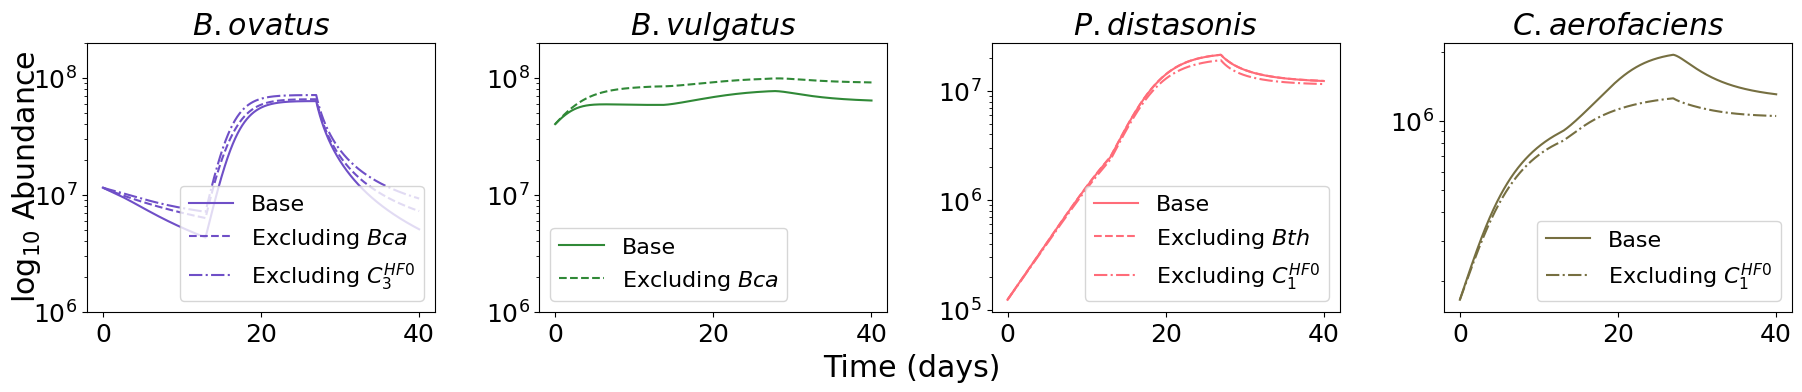

In [8]:
plt.rc('font', size=18)
fig, axs = plt.subplots(1, 4, figsize=(22, 3.5))
axs[0].plot(times, base_mean[2], label='Base', lw=1.5, c=cols[4])
axs[0].plot(times, excluded_mean[0][2], label='Excluding $Bca$', lw=1.5, ls='--', c=cols[4])
axs[0].plot(times, excluded_u_mean[2], label='Excluding $C_{3}^{HF0}$', lw=1.5, ls='-.', c=cols[4])
axs[0].legend(fontsize=16)
axs[0].set_yscale('log')
axs[0].set_ylim([1e6,2e8])
axs[0].set_title('$B. ovatus$')

axs[1].plot(times, base_mean[5], label='Base', lw=1.5, c=cols[2])
axs[1].plot(times, excluded_mean[0][5], label='Excluding $Bca$', lw=1.5, ls='--', c=cols[2])
axs[1].legend(fontsize=16)
axs[1].set_yscale('log')
axs[1].set_ylim([1e6,2e8])
axs[1].set_title('$B. vulgatus$')

axs[2].plot(times, base_mean[9], label='Base', lw=1.5, c=cols[7])
axs[2].plot(times, excluded_mean[3][9], label='Excluding $Bth$', lw=1.5, ls='--', c=cols[7])
axs[2].plot(times, excluded_s_mean[9], label='Excluding $C_{1}^{HF0}$', lw=1.5, ls='-.', c=cols[7])
axs[2].legend(fontsize=16)
axs[2].set_yscale('log')
# axs[2].set_ylim([1e7,1e8])
axs[2].set_title('$P. distasonis$')

axs[3].plot(times, base_mean[6], label='Base', lw=1.5, c=cols[9])
axs[3].plot(times, excluded_s_mean[6], label='Excluding $C_{1}^{HF0}$', lw=1.5, ls='-.', c=cols[9])
axs[3].legend(fontsize=16)
axs[3].set_yscale('log')
axs[3].set_title('$C. aerofaciens$')

fig.supxlabel('Time (days)', y=-0.09)
fig.supylabel('$\log_{10}$ Abundance', x=0.09)
plt.subplots_adjust(wspace=0.3)
fig.savefig('mcnulty-results/mcnulty-HF0-seed12/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()